<a href="https://colab.research.google.com/github/sofezticated-gentleman/Dog-Vision/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/b3a5faf4-6c11-4c33-ba5a-fb85a415636b.tsv", delimiter="\t", quoting=3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
def process_review(review):
  review=re.sub('[^a-zA-z]'," ", review)
  review=review.lower()
  review=review.split()
  for words in review:
    if words not in allstop:
      lemma.lemmatize(words)
  review=" ".join(review)
  return review

In [ ]:
import nltk
import re
nltk.download("stopwords")
nltk.download('omw-1.4')
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
corpus=[] # Cotpus will contain all the processed review
lemma=WordNetLemmatizer()
allstop=stopwords.words('english')
allstop.remove('not')
for i in range(0,1000):
  review=df.iloc[i,0]
  process_review(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
corpus

['Wow... Loved this place.',
 'Crust is not good.',
 'Not tasty and the texture was just nasty.',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
 'The selection on the menu was great and so were the prices.',
 'Now I am getting angry and I want my damn pho.',
 "Honeslty it didn't taste THAT fresh.)",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
 'The fries were great too.',
 'A great touch.',
 'Service was very prompt.',
 'Would not go back.',
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
 'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!',
 'I was disgusted because I was pretty sure that was human hair.',
 'I was shocked because no signs indicate cash only.',
 'Highly recommended.',
 'Waitress was a little slow in service.',
 'This place is not worth your time, let alone Vegas.',
 'did not like at all.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
x=vector.fit_transform(corpus).toarray()
y=df["Liked"]

In [ ]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

Confusion matrix=
 [[11  4]
 [ 1  9]] 
 accuracy= 0.8
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.90      0.69      0.78        13

    accuracy                           0.80        25
   macro avg       0.82      0.80      0.80        25
weighted avg       0.82      0.80      0.80        25



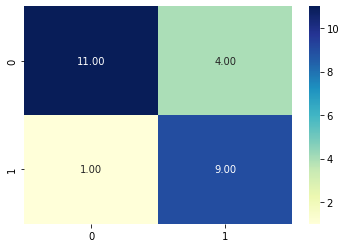

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test= train_test_split(x, y, test_size=0.025, random_state=0)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=7)
classifier.fit(X_train, y_train)
y_preds=classifier.predict(X_test)
  
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm= confusion_matrix(y_test, y_preds)
acc= accuracy_score(y_test, y_preds)
report = classification_report(y_preds, y_test)
print("Confusion matrix=\n", cm, "\n accuracy=", acc)
print(report)
import seaborn as sns
sns.heatmap(cm, annot=True,  fmt='.2f', cmap='YlGnBu')

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
corpus_list=[]
review_inp=input("Please enter your review of our restraurent: ")
review=process_review(review_inp)
corpus_list.append(review_inp)
X_inp=vector.transform(corpus_list)
y_otp=classifier.predict(X_inp)
if y_otp==1:print("Customer liked it")
else:print("Customer did not liked it")

Please enter your review of our restraurent: the smell of the food was foul
Customer did not liked it
